In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:15pt;}
div.prompt{min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_renderulli{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

 <b><font size="6" color="red">ch11. 데이터프레임과 시리즈 (Pandas) 1-8 </font></b>
 
 # 1. 판다스 패키지
  - 데이터 분석을 위해 반드시 알아야 할 패키지. Numpy 기반으로 하며, 다른 많은 라이브러리와 잘 통합되도록 설계
 
 
  - 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공
  
  
  - 판다스 장점 : 
       * 데이터프레임 생성, 파일 io, 레이블링, 부분데이터 추출
       * 크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터 구조변경, 결측치 처리
  
 • https://pypi.python.org/pypi/pandas(package index)

 • http://pandas.pydata.org/pandas-docs/stable/api.html(API reference)

In [3]:
import pandas as pd
pd.__version__

'1.5.3'

In [371]:
data=pd.read_json('Data/ch09_member1.json',
                  encoding='cp949') # 기본 encoding은 utf-8
data
print(data)
print(type(data))

  name  age    email address
0  홍길동   20  h@h.com      서울
1  김길동   30  k@h.com      부산
2  신길동   40  s@h.com      안양
<class 'pandas.core.frame.DataFrame'>


In [7]:
data

,name,age,email,address
0,홍길동,20,h@h.com,서울
1,김길동,30,k@h.com,부산
2,신길동,40,s@h.com,안양


In [10]:
display(data)

,name,age,email,address
0,홍길동,20,h@h.com,서울
1,김길동,30,k@h.com,부산
2,신길동,40,s@h.com,안양


In [11]:
member4 = pd.read_csv('Data/ch09_member4.csv') #기본 encoding utf-8
member4

,Name,age,email,address
0,신길동,30,sindong@hong.com,서울
1,홍길동,20,kildong@hong.com,수원
2,마길동,25,sindong@hong.com,안양


In [14]:
member1 = pd.read_csv('Data/ch09_member1.csv',
                     header = None,
                     names=['name','age','email','address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2. 데이터프레임 만들기

## 2.1 딕셔너리 리스트를 이용해서 데이터프레임 만들기

In [16]:
d = [{'kor':100,'mat':95},{'kor':90,'mat':99}]
df = pd.DataFrame(data = d)

df

,kor,mat
0,100,95
1,90,99


In [18]:
df.to_dict() #데이터프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [19]:
df.to_numpy() #데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [20]:
df.values 데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [22]:
df.dtypes

kor    int64
mat    int64
dtype: object

In [23]:
df['kor'].dtype

dtype('int64')

In [24]:
#타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64) # 데이터프레임을 넘파이배열

0    100.0
1     90.0
Name: kor, dtype: float64

In [29]:
df['kor'].astype('float64')# 데이터프레임을 넘파이배열

0    100.0
1     90.0
2     92.0
Name: kor, dtype: float64

In [30]:
df.dtypes # 열의 타입

kor      int64
mat    float64
eng    float64
dtype: object

In [27]:
d = [{'kor':100,'mat':95},{'kor':90,'mat':99},{'kor':92, 'eng':99}]
df = pd.DataFrame(data = d)

df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int32  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int32(1)
memory usage: 188.0 bytes


In [39]:
type(np.nan) # np.nan결측치

float

In [37]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [36]:
#결측치는 int로 형 변환 불가 (결측치를 대체값으로 치환 후 변환)
#df['mat']= df['mat'.astype('int32')]

# 2.2 리스트를 이용해서 데이터프레임 만들기

In [41]:
kor = [100,90,95,90,65]
mat = [99,100,95,98,94]
df = pd.DataFrame({'kor' : kor, 'mat':mat})
df.head(2)  #상위 2 행만

,kor,mat
0,100,99
1,90,100


In [42]:
df = pd.DataFrame(data = np.c_[kor,mat], columns=['국어', '수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [43]:
df.shape

(5, 2)

In [46]:
l = [['트렌드 코리아2026', '김난도', 18000, 10],
     ['사탄탱고', '라슬로', 17820, 10],
     ['미술관 여행자', '카미유주노', 29700, 10]]
df = pd.DataFrame(l, columns=['책이름','저자','가격','할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [47]:
# %ls : ipython 매직 명령어
# !dir : 쉘명령어

In [51]:

%ls "C:\ai\download\shareData\상가정보\상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 C:\ai\download\shareData\상가정보\상가정보 디렉터리

2025-10-12  오후 03:33    <DIR>          .
2025-10-12  오후 03:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장

In [61]:
df = pd.read_csv(r"C:\ai\download\shareData\상가정보\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv",encoding='utf-8', sep=',',nrows = 70)
df           

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11.0,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1.0,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1.0,NaN,126.855046,37.486242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,MA010120220800001555,미래디자인,NaN,M1,과학·기술,M114,인쇄·제품제작,M11401,명함/간판/광고물 제작,C33910,...,1111015500100210002017522,유덕빌딩,서울특별시 종로구 수표로18길 15,110420,3192,NaN,2.0,NaN,126.990424,37.569511
66,MA010120220800001558,화동커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1111014300101380021026977,NaN,서울특별시 종로구 율곡로3길 82,110230,3061,NaN,NaN,NaN,126.982271,37.579313
67,MA010120220800001579,포트폴리오,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73301,...,1111012400100800006017957,석탄회관,서울특별시 종로구 종로5길 58,110727,3151,NaN,1.0,NaN,126.980337,37.572906
68,MA010120220800001312,멋쟁이,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,1111013600100340031013750,NaN,서울특별시 종로구 인사동길 20-14,110290,3163,NaN,NaN,NaN,126.987299,37.572502


In [63]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [72]:
#판다스 디스플레이옵션
pd.options.display.max_columns = 39 #39열 까지DISPLAY 가능. 기본값 20
pd.options.display.max_rows = 70 #70열 까지DISPLAY 가능. 기본값 60

In [71]:
pd.options.display.max_columns

39

In [73]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3 read_csv

In [75]:
pd.read_csv?

In [372]:
#(1) csv 파일  불러오기(기본값)
member = pd.read_csv('Data/ch11_member.csv',
                    #, encoding ='utf-8', sep =',', comment 주석처리x
                    )
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [373]:
#문자형으로 읽어들인 birth를 datetime 형으로
#형변환 : astype('int64'), astype('datetime64')
#        to_datetime()함수
#member['Birth'].astype('datetime64') 비추
member['Birth'] = pd.to_datetime(member['Birth'])

member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [374]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [375]:
member['Age'] = member['Age'].astype(np.int16)

In [376]:
# (2) 특정 행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('Data/ch11_membercp949.csv',
                    encoding = 'cp949',skiprows=[1,6]) #1,6번째 행 제외하고 읽어오기 (시작은 0이 아니라 1부터)
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [377]:
# (3) 상위 몇 행만 sep문자는 , 아닌 csv 파일 읽어오기
member = pd.read_csv('Data/ch11_member.csv',
                     nrows=5, #상위 5행만
                     sep='|')
member

,"Name,Age,Email,Address,Birth"
0,"홍길동,20,hong@hong.com,서울시 강동구,1999-01-01"
1,"홍길서,30,seo@hong.com,서울시 중구,1999-12-01"
2,"홍길남,21,nam@hong.com,서울시 강동구,1999-11-01"
3,"홍길북,22,buk@hong.com,서울시 관악구,1999-05-01"
4,"홍길중,23,mid@hong.com,부산시 중구,1999-01-30"


In [378]:
#(4) 주석(#) 제외, datetime형 필드를 지정하여 csv파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv',
                    sep = '\t', # 구분자 설정
                    comment = '#', # 주석 제외
                     parse_dates = ['Birth']) #datetime64형으로 읽어올 필드 지정
                     
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## 2.4 패키지에서 가져오기 : iris 데이터
 - iris 가져오기 방법 1 : sklearn(머신러닝 패키지)
 - iris 가져오기 방법 2 : statsmodels (R 패키지)
 - iris 가져오기 방법 3 : seaborn (시각화 패키지)
 
 ### 2.4.1 iris 방법 1 : sklearn
  - sklearn.datasets 모듈 데이터 (iris)를 데이터프레임으로 변환
 

In [379]:
from sklearn import datasets # 머신러닝을 공부하기 위한 학습 데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리 형식으로 제공 


iris = datasets.load_iris()
print(type(iris)) # Bunch 타입 (딕셔너리를 상속 받는 타입,), 딕셔너리처럼 동작
iris.get('data')

#print(iris.DESCR) iris 데이터셋의 설명

print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [380]:
iris.data #독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [381]:
#데이터프레임의 열이름
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [382]:
#데이터프레임의 열이름(추천)
[col[:-5].replace(' ', '_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [383]:
iris.target # ML/DL 학습시 타겟변수(종속변수)
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [384]:

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [385]:

iris.target_names[iris.target] # 데이터프레임에 쓸 타겟변수(가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [386]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target].reshape(-1, 1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [387]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [388]:
#1. 독립변수와 종속변수를 stack 한 후 데이터프레임으로
df = pd.DataFrame(np.hstack((data,target)),
                  columns=iris.feature_names + ['species'])
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [389]:
#df.sepal length (cm)
# df['sepal length (cm)'] 
df.columns = [col[:-5].replace(' ', '_') for col in iris.feature_names] + ['species']
df.head(1)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [390]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: object

In [391]:
# 2. 독립변수, 종속변수를 따로 데이터프레임으로 생성 -> 두 데이터프레임 연결

X = pd.DataFrame(iris.data,
                 columns = [col[:-5].replace(' ','_') for col in iris.feature_names] )
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [392]:
y = pd.DataFrame(iris.target_names[iris.target], columns = ['species'])
y.head(1)

,species
0,setosa


In [393]:
print('X의 shape :',X.shape )
print('y의 shape :',y.shape)
print('X의 index :',X.index)
print('y의 index :',y.index)

X의 shape : (150, 4)
y의 shape : (150, 1)
X의 index : RangeIndex(start=0, stop=150, step=1)
y의 index : RangeIndex(start=0, stop=150, step=1)


In [394]:
iris_df = pd.concat( [X,y],axis =1 ) # 두개의 데이터프레임을 열로 연결
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2.4.2 iris 방법 2 :statsmodels

In [395]:
#R 패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                    package = 'datasets',
                                     cache=True) #한번 다운로드 한 데이터를 pc에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [396]:
iris = iris_dataset.data
iris.head() #기본값 5

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [397]:
iris['Species']
# iris.Sepal.Length 열 이름에 .이 있으면 iris.Sepal.Lengh 접근 불가

#column 이름 바꾸기
iris.columns 

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [398]:
#column 이름 바꾸기
#                        .을 -로바꾸기 \ 소문자
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3 iris 방법 3 : seaborn

In [399]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [400]:
#데이터프레임을 파일로 출력 (4kb)
iris.to_csv('Data/ch11_iris.csv',
           sep=',',encoding = 'cp949', # 기본값은 utf-8 #cp949로 하면 엑셀로, utf-8은 주피터로
           index=False) #행 이름이 생략되서 파일 출력


In [401]:
iris.to_csv('Data/ch11_iris.csv.gz', #889byte
           index=False,
           compression='infer'#파일 확장자에 맞게 압축
           )

In [402]:
import pandas as pd

#압축 안한 파일의 경우
read_iris = pd.read_csv('Data/ch11_iris.csv')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [403]:
#압축한 파일의 경우

read_iris = pd.read_csv('Data/ch11_iris.csv.gz',compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3. 이름 지정하기
# 3.1 열이름 지정하기

In [404]:
member = pd.read_csv('Data/ch11_member.csv',
                     comment ='#',
                     parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [405]:
member.columns = ['이름','나이','메일','주소','생일']
member.head(1)

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 3.2 행이름 지정하기

In [406]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [407]:
member.index = range (11,16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [408]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [409]:
#member['이름']['동'] 비추천

member.loc['동','이름'] #행과 열 이름으로 부분 데이터 조회 : loc

'홍길동'

In [410]:
member.loc['북','주소']

'서울시 관악구'

In [411]:
#index를 이름열로 ( 실행 결과가 출력 되어 나오면 return될 뿐, member는 안바뀜)
member.set_index('이름')

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [412]:
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [413]:
#member를 수정하려면 1) 할당 2)inplace 매개변수에 True (기본값은 False)
member1 = member.set_index('이름')
member1.head(1)

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [414]:
member.set_index('이름',inplace=True)

In [415]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [416]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [417]:
#index를 column으로 편입
member.reset_index(inplace = True)

In [418]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [419]:
member.index = [1,2,3,0,1]
member

,이름,나이,메일,주소,생일
1,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
2,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
3,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [420]:
#기존 index를 지우고 sequence 순서로 하는 방법
#비추
member.index = range(len(member))
member


,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [421]:
#방법 2. 기존 index를 새로운 열에 편입 시키지 않고 제거 후 새로운 숫자 index로 초기화
member = member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [422]:
#datetime 열에서 날짜 및 시간에 관련된 정보를 추출
member['생일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생일, dtype: int64

In [423]:
member['생일'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64

In [424]:
member['생일'].dt.weekday # 0:월, 1:화, 2:수, ... 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생일, dtype: int64

## 3.3 레벨 이름 지정하기

In [425]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [426]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [427]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [428]:
member.columns =[['기본정보','기본정보','기본정보','추가정보','추가정보'],
                ['이름','나이','메일','주소','생일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [429]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member


대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [430]:
member.loc[('상하','북'),('기본정보','이름')]

'홍길북'

In [431]:
member.loc['상하','기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [432]:
member.loc[('상하','중'),'기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

# 4. 부분데이터 조회

## 4.1 단일열 조회

In [433]:
member = pd.read_csv('Data/ch11_member.csv',
                     comment="#",
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [434]:
member['Name']

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [435]:
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [436]:
#member[] #[]안에는 열 이름 혹은 조건만
#행 이름으로 [] 조회할 경우 에러 나니 loc쓸것

In [437]:
member[['Name','Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2 loc을 이용한 조회
 - df.loc [행이름, 열이름]  : 행 이름, 열 이름으로 조회
     * 행 이름과 d열 이름 자리에 슬라이싱 (from:to) ==> from 부터 to(포함)까지
     * 행 이름과 열 이름 자리에 리스트 올 수 있음

In [438]:
member.loc[0:2]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [439]:
member.loc[0:2, :] # 모든 열을 다 출력 할 경우 열 생략 가능
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2, :] 
member.loc[0:2, ...]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [440]:
member.index = ['동','서','남','북','중']
member.loc["동":"남"]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [441]:
member.loc['동':'남','Name':'Address'] #동-남행, Name~Address 열 까지

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [442]:
# 동, 남행, name, email, address열
member.loc [['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [443]:
member.loc[:,'Name'] #행은 처음부터 끝, 열은  Name

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3 iloc을 이용한 조회
 - df.iloc [행순번, 열순번] (*번째 열/행) : 행 이름, 열 이름으로 조회
     * 행 순번과 열 순번 자리에 슬라이싱 (from:to:by) ==> from 부터 to 앞 까지
     * 행 순번과 열 순번 자리에 리스트

In [444]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [445]:
# 동 (0) 행부터 남 (2) 행까지 모든 열

member.iloc[0:3]
member.iloc[0:3, ]
member.iloc[0:3, :]
member.iloc[0:3, ...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [446]:
#0번째 행 
member.iloc[0]

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [447]:
# 동 행부터 남 행까지 Name (0) 부터 Address (3) 열까지
member.iloc[0:3,0:4]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [448]:
member.iloc[0:3,0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [449]:
member.iloc[0:3,:4]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [450]:
# 짝수번째 행의 마지막 열을 재회하고 출력
member.iloc[::2,:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [451]:
# 마지막 행부터 처음 행까지 거꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [452]:
# 동행, 남행, Name (0)열, Email(2)열, Address(3) 열
member.iloc[[0,2],[0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [453]:
#Name (0) 열
member.iloc[:,0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [454]:
member.iloc[:,:]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.4 조건으로 조회하기

In [455]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [456]:
#Name이 홍길남인 행을 모두 출력
member['Name']=='홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [457]:
member[member['Name']=='홍길남']

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [458]:
member.loc[member['Name']=='홍길남'] 

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [459]:
member.loc[[False, False, True, False, False]]#와 같음. 사실상 작동원리가 이것

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [460]:
#Name 이 홍길남의 이름과 나이 email 출력
member.loc[member['Name']=='홍길남','Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [461]:
#Name 이 홍길남의 이름과 email 출력
member.loc[member['Name']=='홍길남',('Name','Email')]

,Name,Email
남,홍길남,nam@hong.com


In [462]:
member.loc[member['Name']=='홍길남',['Name','Email']] # 위 처럼 튜플형태도 작동 하나 리스트형태로 작성하는 것이 major

,Name,Email
남,홍길남,nam@hong.com


In [463]:
# 23세 이상 데이터 조회 (모든 열)
member.loc[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [464]:
# 23세 이상 Name, Age, Email
member.loc[member['Age']>=23,"Name":"Email"]

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [465]:
# 23세 이상 Name, Age, Address

In [466]:
member.loc[member['Age']>=23,['Name','Age','Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [467]:
# ~ : 반대를 의미
member[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [468]:
# ~ : 반대를 의미
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [469]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부 : ', address.startswith('서울시'))
print('중구 포함 여부 : ', address.find('중구') != -1) #-1이면 포함 안된 것

서울시로 시작하는지 여부 :  True
중구 포함 여부 :  False


In [470]:
#서울시로 시작하는 데이터
#             문자열로 받으려고 .str.
member['Address'].str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [471]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [472]:
# Address에 중구를 포함하는 데이터 (방법 1)
member['Address'].str.find('중구')

동   -1
서    4
남   -1
북   -1
중    4
Name: Address, dtype: int64

In [473]:
member['Address'].str.find('중구')!=-1

동    False
서     True
남    False
북    False
중     True
Name: Address, dtype: bool

In [474]:
member[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [475]:
# Address에 중구를 포함하는 데이터 (방법 2)
member ['Address'].str.contains('중구')

동    False
서     True
남    False
북    False
중     True
Name: Address, dtype: bool

In [476]:
member[member ['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [477]:
#시리즈.isin([])
#이름이 홍길동 이거나 홍길남이 데이터
member["Name"].isin(['홍길동','홍길남'])

동     True
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [478]:
member[member["Name"].isin(['홍길동','홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [479]:
#이름이 홍길동 이거나 홍길남인 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동','홍길남']),['Name','Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [480]:
#2000년 이전에 태어난 데이터
member['Birth'].dt.year<2000

동    True
서    True
남    True
북    True
중    True
Name: Birth, dtype: bool

In [481]:
member[member['Birth'].dt.year<2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [482]:
#조건연산자를 이용해서 추출 (조건 2개)
import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[np.nan,80,np.nan,85],
                    'kor':[100,80,60,np.nan]})  # np.nan ==> 결측치 라는 뜻
display(data)

#영어 80이상, 국어 80이상인 데이터 추출

data[(data['eng']>=80) & (data['kor']>=80)]

,eng,kor
0,NaN,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
1,80.0,80.0


In [483]:
#결측치 확인 방법 1

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [484]:
#결측치 확인 방법 2
data.isna() #결측치 여부

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [485]:
True+True+False

2

In [486]:
True+False

1

In [487]:
True+True

2

In [488]:
data.isna().sum(axis=0) # 각 열의 결측치 갯수

eng    2
kor    1
dtype: int64

※ 데이터프레임의 부분 데이터 조회 방법
 - df[열이름] : 특정 열 조회
 - df[조건 ] : 조건에 맞는 모든 행 조회
 - df.loc[행이름, 열이름]
     - 행이름, 열 이름 자리에 슬라이싱, 리스트
     - 열이름 생략시 모든 열
     - 행 이름 자리에 조건'
    
 - df.iloc[행순번, 열순번]
     - 행이름, 열 이름 자리에 슬라이싱, 리스트
     - 열이름 생략시 모든 열

 - 데이터프레임 quiz

In [489]:
#iris 가져오기 (sklearn, statesmodels, seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [490]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [491]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10,'sepal_length':'petal_width']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [492]:
iris.iloc[:10,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [493]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10,('sepal_length','petal_length')]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [494]:
iris.iloc[3:10,[0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [495]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[:100:50,]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [496]:
iris.iloc[:101:50,]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [497]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[::25,('sepal_length','petal_width')]

,sepal_length,petal_width
0,5.1,0.2
25,5.0,0.2
50,7.0,1.4
75,6.6,1.4
100,6.3,2.5
125,7.2,1.8


In [498]:
iris.iloc[::25,[0,3]]

,sepal_length,petal_width
0,5.1,0.2
25,5.0,0.2
50,7.0,1.4
75,6.6,1.4
100,6.3,2.5
125,7.2,1.8


In [499]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor' ]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [500]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'][:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [501]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5][:5]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [502]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2,('sepal_length','sepal_width','petal_length')]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [503]:
iris[np.logical_and(iris['species']=='versicolor',
              iris['sepal_length']>=6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5. 데이터 삭제 및 추가
## 5.1 데이터프레임의 요소 삭제
 - df.drop(삭제할 열 이름이나 행 이름, axis) 
   * axis = 0 (기본값) 일때는 행, 1일때는 열 삭제


In [504]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [505]:
#1) 단일 행 삭제
member.drop('중', axis=0) # axis =0 (기본값) : 해당 행 삭제
# 삭제한 결과를 member 적용 (1) 할당 member = member.drop('중', axis=0) 
#                        (2) member.drop('중',axis=0, inplace = True)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [506]:
#2) 복수행 삭제
member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [507]:
# 3) 열 삭제
member.drop(['Name','Email'],axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


# 5.2 데이터프레임의 요소 추가

In [508]:
# 1) 열 추가
member['nickname'] = '뺵'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,뺵
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,뺵
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,뺵
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,뺵
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,뺵


In [509]:
# 2) 리스트를 이용한 열 추가
member['favourite_no'] = [3,2,3,5,None]
member

,Name,Age,Email,Address,Birth,nickname,favourite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,뺵,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,뺵,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,뺵,3.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,뺵,5.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,뺵,NaN


In [510]:
# 3) favourite_num 열에 결측치를 할당 후, 원하는데이터 할당
member['favourite_num'] = None
member.iloc[::2, -1] = 7
member.head(1)

,Name,Age,Email,Address,Birth,nickname,favourite_no,favourite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,뺵,3.0,7


In [513]:
# 4) 딕셔너리로 행 추가
member.drop(['Email','Birth','favourite_no','favourite_num'],axis=1)

,Name,Age,Address,nickname
동,홍길동,20,서울시 강동구,뺵
서,홍길서,30,서울시 중구,뺵
남,홍길남,21,서울시 강동구,뺵
북,홍길북,22,서울시 관악구,뺵
중,홍길중,23,부산시 중구,뺵


In [515]:
new_member = pd.DataFrame([
    {'Name':'홍길쑥','Age':30,'Address':'서울','nickname':'빡'}
])

new_member

,Name,Age,Address,nickname
0,홍길쑥,30,서울,빡


In [518]:
pd.concat ([member, new_member]).reset_index(drop=True)# ([위,아래]) => 두 데이터 프레임 연결
member

,Name,Age,Email,Address,Birth,nickname,favourite_no,favourite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,뺵,3.0,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,뺵,2.0,None
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,뺵,3.0,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,뺵,5.0,None
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,뺵,NaN,7


# 6. 병합과 연결
## 6.1 merge()를 이용한 데이터프레임 병합

In [524]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})

df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})

df1.merge(df2) #내부join (양쪽이 다 일치하는 데이터만 병합)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [525]:
df1.merge(df2,how='left') #왼쪽의 df1 데이터는 모두 남기고, 오른쪽 df2가 매칭되도록

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [527]:
df1.merge(df2,how='right') #오른쪽의 df2 데이터는 모두 남기고, 왼쪽 df1가 매칭되도록

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [528]:
df1.merge(df2,how='outer') #양쪽 df1, df2 데이터 모두 남김 

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


In [529]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})

df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,10
1,b,20
2,c,30
3,f,40


In [531]:
#df3.merge(df4) (공통 column이 없어서 에러남)

df3.merge(df4, left_on='key3',right_on='key4',how='inner') 

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


# 6.2 concat()을 이용한 데이터프레임 연결
 - pd.concat([df1, df2, df3 ...], axis)
     * axis=0(기본값) ==> 위아래 연결
     * axis=1 ==> 좌우로 연결
     

In [537]:
pd.concat([df3,df4],axis=1)

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [540]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})

df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})
pd.concat([df3,df4]).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7. 정렬(행이름, 열이름, 값에 의한 정렬)
 - df.sort_index(axis) : 행 or 열 이름으로 정렬
 - df.sort_values(by=[정렬기준이 될 열 이름], ascending=T/F, inplace=T/F) ==> 특정 열 값에 의한 정렬

In [556]:
member = pd.read_csv('Data/ch11_member.csv',comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행 이름으로 정렬

In [558]:
member.sort_index(axis=0, ascending=True) #ascending은  true가 기본값 

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [559]:
member.sort_index(axis=0, ascending=False) 

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


## 7.2 열 이름으로 정렬

In [561]:
member = member.sort_index(axis=1) #axis='columns'
member

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [562]:
member.sort_values(by='Age') #age 기준으로 오름차순 정렬 (ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [563]:
member.sort_values(by='Age',ascending=False)

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [564]:
# age 기준 내림차순 정렬, age가 같으면 email 기준 오름차순 정렬
member.loc[:,'Age'] = [20,20,30,30,30]
member

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,20,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,30,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중


In [566]:
member.sort_values(by=['Age','Email'], ascending = [False, True)

,Address,Age,Birth,Email,Name
서,서울시 중구,20,1999-12-01,seo@hong.com,홍길서
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,30,1999-11-01,nam@hong.com,홍길남
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북


# 8. 기초통계분석
 - Pandas는 기초통계(데이터 요약), statmodels : 난이도 있는 통계
 - count : NaN 을 제외한 데이터 수 
 - min : 최소값 
 - max : 최대값  
 - sum : 합
 - cumsum : 누적합 
 - cumprod: 누적곱
 - mean : 평균
 - median : 중위값
 - std :표준편차
 - var : 분산
 - quantile : 분위수 (0사분위수 == 최소값, 1사분위, 2사분위 (중위값), 3사분위수, 4사분위수 (최대값)
     * 이상치 구하는 용도 : Q1 - 1.5 * IQR - Q3 + 1.5 * IQR
 - describe : 요약통계량
 - corr :상관관계 (계수)
 - rolling (n).mean() : n 개씩 평균출력 - 데이터변동이 많을 때 추세(패턴)을 부드럽게 보고 싶을 때 보고 싶을 때

In [3]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica


In [2]:
iris.head(1)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa


## 8.1 min, max ...

In [6]:
iris.min(axis=1) # 열별 최소값 (axis = 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_976\3338648251.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.min(axis=1) # 열별 최소값 (axis = 0)


0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [7]:
iris.median(axis=0,numeric_only=True) #iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [11]:
X = iris.loc[:,'sepal_length':'petal_width']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
X.mean(axis=0) #열별 평균 == 행들의평균(axis=0이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [13]:
X.mean(axis='rows')#열별 평균 == 행들의평균(axis=0이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [24]:
import pandas as pd
df = pd.DataFrame(data = [1,3,4,7,10], columns = ['value'])
#interpolation = 'nearest' : 정확한 구간의 값이 없을 경우 가까운 값
df['value'].quantile(q=[0,0.25,0.55,0.75,1],interpolation='nearest')

0.00     1
0.25     3
0.55     4
0.75     7
1.00    10
Name: value, dtype: int64

In [25]:
#interpolation = 'midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0,0.25,0.55,0.75,1],interpolation='midpoint')

0.00     1.0
0.25     3.0
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [27]:
X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [32]:
qunt = X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0,idx]
    Q1 = qunt.iloc[1,idx]
    Q3 = qunt.iloc[3,idx]
    max = qunt.iloc[4,idx]
    iqr = Q3-Q1
    lower_outlier = Q1 - 1.5*iqr # 하한이상치 limit
    upper_outlier = Q3 + 1.5*iqr # 상한이상치 limit
    print(f"{idx}번째 : {col}결과는 ", end='')
    print('하한 이상치 여부 : {}, 상한 이상치 여부 : {}'.format(min<lower_outlier,
                                                            max>upper_outlier))

0번째 : sepal_length결과는 하한 이상치 여부 : False, 상한 이상치 여부 : False
1번째 : sepal_width결과는 하한 이상치 여부 : True, 상한 이상치 여부 : True
2번째 : petal_length결과는 하한 이상치 여부 : False, 상한 이상치 여부 : False
3번째 : petal_width결과는 하한 이상치 여부 : False, 상한 이상치 여부 : False


<Axes: >

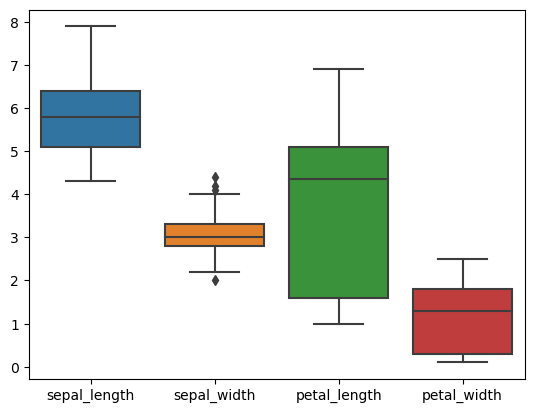

In [33]:
import seaborn as sns
sns.boxplot(data = iris)

In [36]:
iris['sepal_length'].rolling(5).mean()[4:30]# 인접한 5개의 평균

0       NaN
1       NaN
2       NaN
3       NaN
4      4.86
       ... 
145    6.58
146    6.46
147    6.60
148    6.48
149    6.32
Name: sepal_length, Length: 150, dtype: float64

# 8.2 요약통계량
 - describe()

In [37]:
# 1) 기본 요약 통계량
iris.describe() # 기본값: 숫자열에서의 요약통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
iris['species'].describe() #문자열에서의 요약통계량  : 데이터 갯수, 종류(unique),최빈데이터(top), 최빈데이터 갯수 (freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [39]:
iris.species.describe() #문자열에서의 요약통계량   : 데이터 갯수, 종류(unique),최빈데이터(top), 최빈데이터 갯수 (freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [42]:
# 2) describe() 의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                   'b':[2.1,4]*3,
                   'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                   'd':[True,False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [43]:
df.describe()  #숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [45]:
# include 매개변수를 통해 요약통계량을 출력할 타입 지정
df.describe(include=['float64','bool','object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [46]:
df.describe(include='all') #모든 타입의 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [47]:
#exclude 매개변수를 이용해서 기본통게량 출력 에서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [49]:
df['c'].unique() #특정 column의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [50]:
#고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [52]:
# 공분산 : (x1 - x1 평균) * (x2-x2평균) 들의 합을 n-1로 나눈 값
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [53]:
# -1 < 상관계수 (공분/(x1 표준편차 * x2 표준편차)) < 1 
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


https://matplotlib.org/stable/users/explain/colors/colormaps.html (colormap) 시각화교안 21page

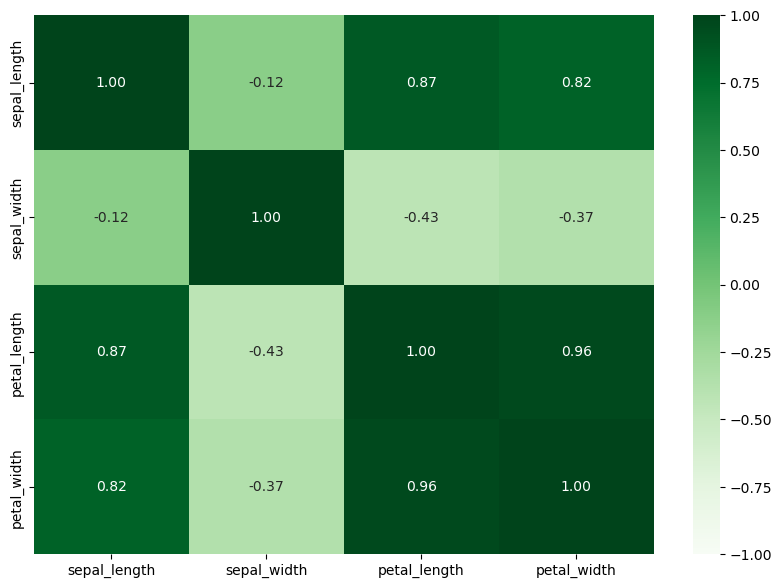

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),vmin=-1, vmax=1, annot=True,fmt='.2f',cmap='Greens')
plt.show()